/Users/youcefs/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

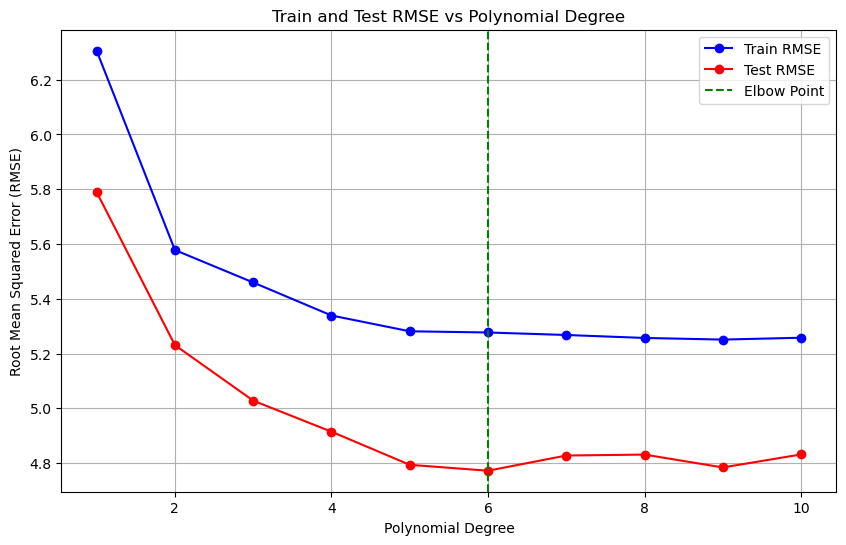

Best Polynomial Degree (Elbow Point): 6
Final Model RMSE (Degree=6): 4.77


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston  # Use Boston dataset

# Load Dataset
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)  # Features
y = pd.DataFrame(boston.target, columns=["MEDV"])  # Target

# Use only one feature for simplicity
X = X[['LSTAT']]  # % lower status of the population
y = y.values  # Convert to numpy array for compatibility

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize arrays for storing MSE values
train_mse = []
test_mse = []

# Loop through polynomial degrees 1 to 10
degrees = range(1, 11)
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = poly_model.predict(X_train_poly)
    y_test_pred = poly_model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Convert MSE to RMSE for better interpretability
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Plot RMSE vs Degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse, label='Train RMSE', marker='o', color='blue')
plt.plot(degrees, test_rmse, label='Test RMSE', marker='o', color='red')
plt.axvline(x=np.argmin(test_rmse) + 1, color='green', linestyle='--', label='Elbow Point')
plt.title("Train and Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.legend()
plt.grid(True)
plt.show()

# Print Best Degree
best_degree = np.argmin(test_rmse) + 1
print(f"Best Polynomial Degree (Elbow Point): {best_degree}")

# Train Final Model with Best Degree
poly_features_best = PolynomialFeatures(degree=best_degree, include_bias=False)
X_train_poly_best = poly_features_best.fit_transform(X_train)
X_test_poly_best = poly_features_best.transform(X_test)

final_model = LinearRegression()
final_model.fit(X_train_poly_best, y_train)

# Evaluate Final Model
y_test_pred_final = final_model.predict(X_test_poly_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
print(f"Final Model RMSE (Degree={best_degree}): {final_rmse:.2f}")